In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import modules
import sys
sys.path.append('../modules')
import model
import utils

from scipy.optimize import fsolve

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#118ab2", "#e76f51", "#2a9d8f", '#e63946', '#7b2cbf', '#2b2d42', '#ff8fab', '#6c757d', '#fdc500', '#5bc0be']) 

In [142]:
N = 200
Nsteps = 200000
dt = 0.01

Time = np.arange(Nsteps)*dt

x0 = np.ones(N)*2.5
y0 = np.ones(N)*2.5

x0rand = np.random.randn(N)
y0rand = np.random.randn(N)

mu = 1
muHat = 1
delta = -1/3
muI = 0.6
alpha = 0.1
beta = 0.8
gamma = 0.7
sigma = 0.1

model_kwargs = {'mu': mu, 'muHat': muHat, 'delta': delta,
                'muI': muI, 'alpha': alpha, 'beta': beta,
                'gamma': gamma, 'sigma': sigma}

# Brownian return times

## Brownian trajectories

In [62]:
epsilon = 0.

In [63]:
x_BR, y_BR = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0rand, y0rand, epsilon = epsilon)

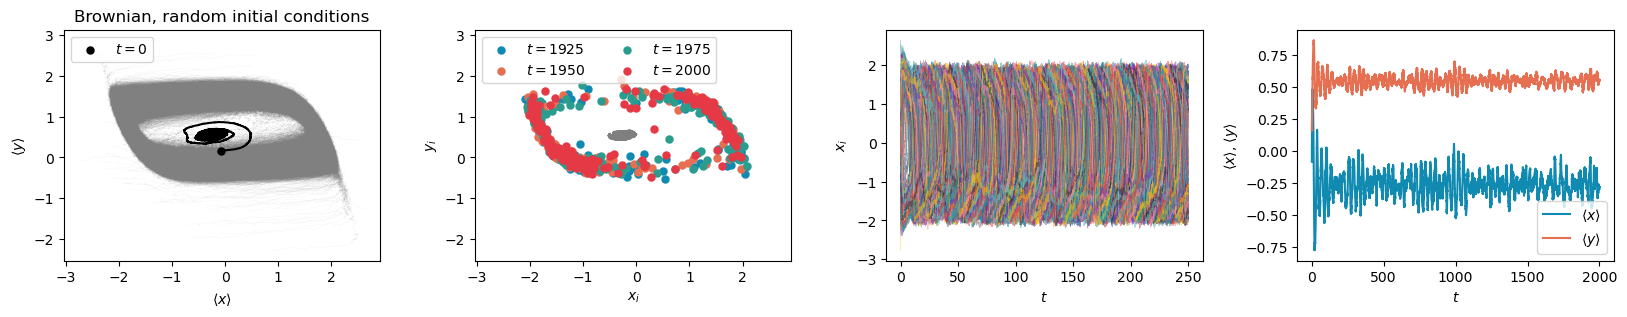

In [64]:
utils.plot_results(x_BR, y_BR, Time, title = 'Brownian, random initial conditions', steps_to_plot=25000, Nosc_to_plot=1000)
plt.show()

In [65]:
args = (mu, muHat, delta, muI, epsilon, alpha, beta, gamma)

xUnst, yUnst = fsolve(model.equations, (-0.5, -2), args = args)
xUnst, yUnst

(-0.6802657008999753, 0.024667873875030853)

In [66]:
xCenter, yCenter = utils.estimate_baricenter(x_BR[-10000:], y_BR[-10000:])
xCenter, yCenter

(-0.25780755452084003, 0.5648329395907337)

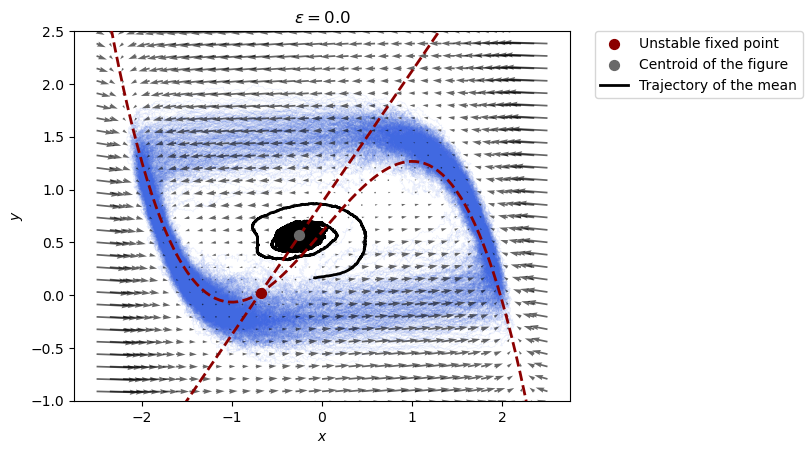

In [67]:
xspace, yspace = np.meshgrid(np.linspace(-2.5, 2.5, 35), np.linspace(-1.5, 2.5, 35))

u, v = model.equations((xspace, yspace), *args)

plt.quiver(xspace, yspace, u, v, color='k', alpha=0.6, scale = 50, width = 0.0035)

plt.scatter(xUnst, yUnst, color='darkred', alpha=1, s = 50, zorder = 10, label = 'Unstable fixed point')

xx = np.linspace(-2.5, 2.5, 100)
yy = np.linspace(-2.5, 2.5, 100)
plt.plot(xx, ((mu + epsilon)*xx + delta*xx**3 + muI)/muHat, color='darkred', alpha=1, lw = 2, zorder = 10, ls = '--')
plt.plot(xx, (xx + gamma)/beta, color='darkred', alpha=1, lw = 2, zorder = 10, ls = '--')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-1, 2.5)

plt.plot(x_BR[-5000:], y_BR[-5000:], color='royalblue', alpha=0.1, lw = 0.5, zorder = -1)

plt.scatter(xCenter, yCenter, color='dimgray', alpha=1, s = 50, zorder = 10, label = "Centroid of the figure")
plt.plot(np.mean(x_BR, axis = 1), np.mean(y_BR, axis = 1), color='k', lw =2, label = 'Trajectory of the mean')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("$\epsilon = {}$".format(epsilon))

plt.savefig('../plots/phase_space_eps{}.png'.format(epsilon), bbox_inches='tight', dpi = 300)

plt.show()

In [149]:
epsilon = 0.1

In [150]:
x_BR, y_BR = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0rand, y0rand, epsilon = epsilon)

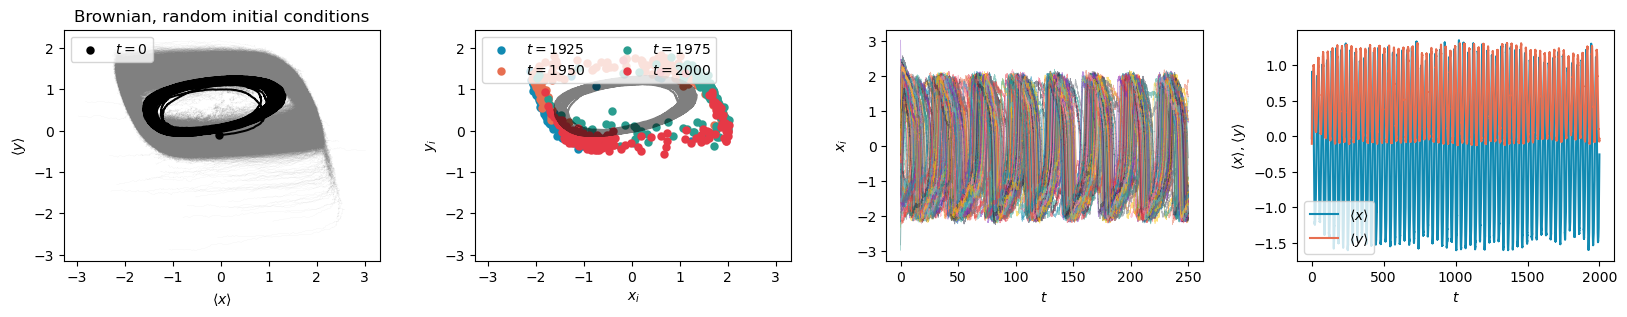

In [151]:
utils.plot_results(x_BR, y_BR, Time, title = 'Brownian, random initial conditions', steps_to_plot=25000, Nosc_to_plot=1000)
plt.show()

In [152]:
args = (mu, muHat, delta, muI, epsilon, alpha, beta, gamma)

xUnst, yUnst = fsolve(model.equations, (-0.5, -2), args = args)
xUnst, yUnst

(-0.7797573234032938, -0.09969665425411738)

In [153]:
xCenter, yCenter = utils.estimate_baricenter(x_BR[-10000:], y_BR[-10000:])
xCenter, yCenter

(-0.19296277673827147, 0.6026461009706765)

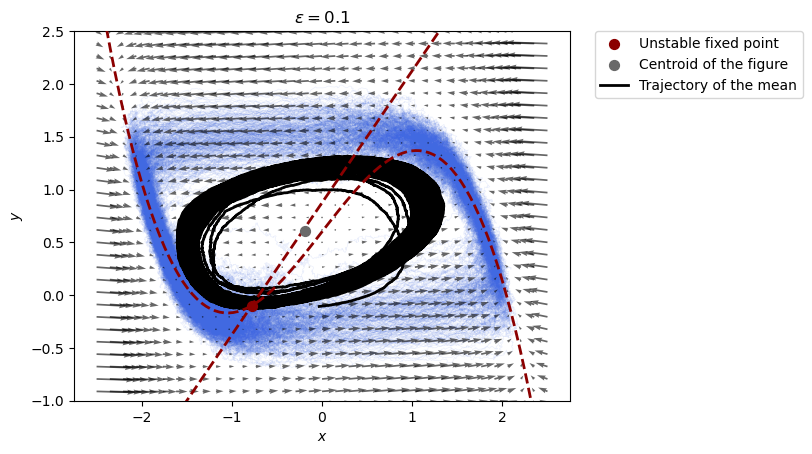

In [154]:
xspace, yspace = np.meshgrid(np.linspace(-2.5, 2.5, 35), np.linspace(-1.5, 2.5, 35))

u, v = model.equations((xspace, yspace), *args)

plt.quiver(xspace, yspace, u, v, color='k', alpha=0.6, scale = 50, width = 0.0035)

plt.scatter(xUnst, yUnst, color='darkred', alpha=1, s = 50, zorder = 10, label = 'Unstable fixed point')

xx = np.linspace(-2.5, 2.5, 100)
yy = np.linspace(-2.5, 2.5, 100)
plt.plot(xx, ((mu + epsilon)*xx + delta*xx**3 + muI)/muHat, color='darkred', alpha=1, lw = 2, zorder = 10, ls = '--')
plt.plot(xx, (xx + gamma)/beta, color='darkred', alpha=1, lw = 2, zorder = 10, ls = '--')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-1, 2.5)

plt.plot(x_BR[-5000:], y_BR[-5000:], color='royalblue', alpha=0.1, lw = 0.5, zorder = -1)

plt.scatter(xCenter, yCenter, color='dimgray', alpha=1, s = 50, zorder = 10, label = "Centroid of the figure")
plt.plot(np.mean(x_BR, axis = 1), np.mean(y_BR, axis = 1), color='k', lw =2, label = 'Trajectory of the mean')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("$\epsilon = {}$".format(epsilon))

plt.savefig('../plots/phase_space_eps{}.png'.format(epsilon), bbox_inches='tight', dpi = 300)

plt.show()

In [155]:
epsilon = 0.1

In [156]:
sigma0 = 0.1

x0_Center = np.random.randn(N)*sigma0 + xCenter
y0_Center = np.random.randn(N)*sigma0 + yCenter

x0_Unst = np.random.randn(N)*sigma0 + xUnst
y0_Unst = np.random.randn(N)*sigma0 + yUnst

In [157]:
Nsteps = 25000
Time = np.arange(Nsteps)*dt

x_BR_Unst, y_BR_Unst = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0_Unst, y0_Unst, epsilon = epsilon, **model_kwargs)

x_BR_Center, y_BR_Center = model.simulate_Fitzugh_Nagumo(N, Nsteps, dt, x0_Center, y0_Center, epsilon = epsilon, **model_kwargs)

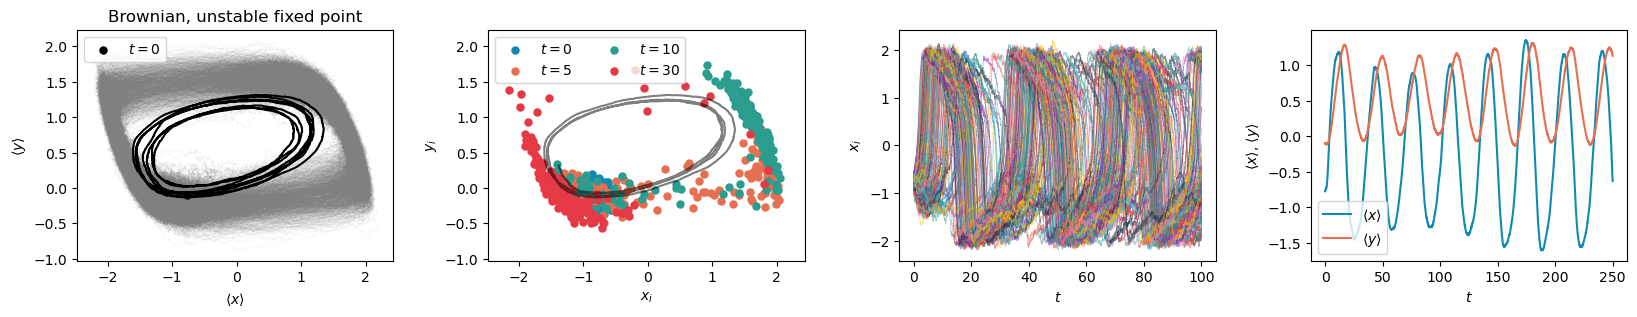

In [158]:
fig, ax = utils.plot_results(x_BR_Unst, y_BR_Unst, Time, title = 'Brownian, unstable fixed point', steps_to_plot=10000, Nosc_to_plot=1000,
                   idxs_to_plot=[0, 500, 1000, 3000])

plt.savefig('../plots/brownian_eps{}_start_unstable.png'.format(epsilon), bbox_inches='tight', dpi = 300)

plt.show()

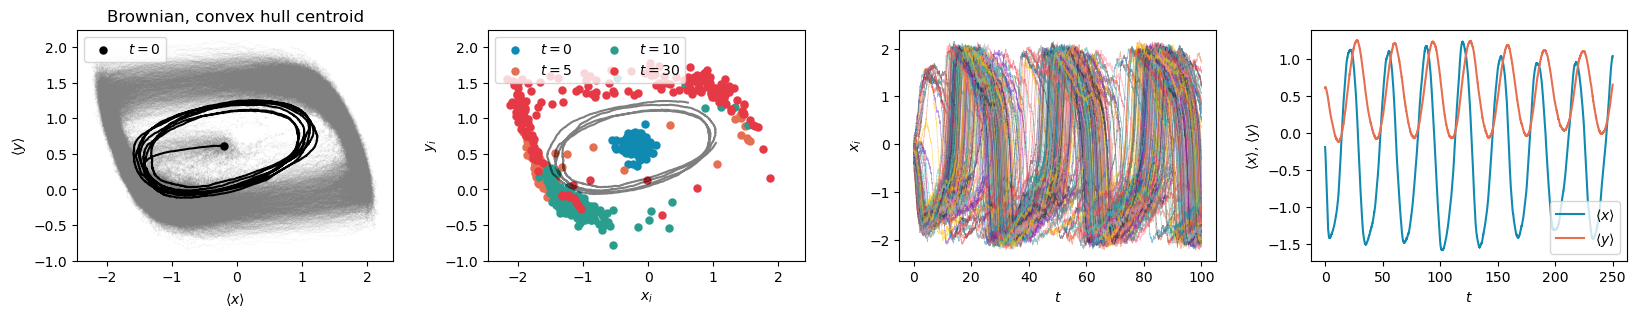

In [159]:
fig, ax = utils.plot_results(x_BR_Center, y_BR_Center, Time, title = 'Brownian, convex hull centroid', steps_to_plot=10000, Nosc_to_plot=1000,
             idxs_to_plot=[0, 500, 1000, 3000])

plt.savefig('../plots/brownian_eps{}_start_center.png'.format(epsilon), bbox_inches='tight', dpi = 300)

plt.show()

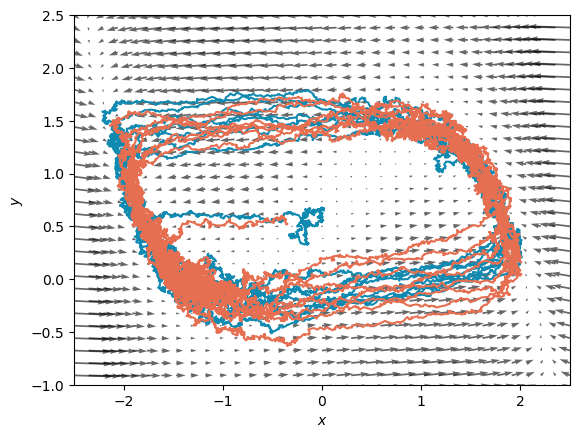

In [166]:
plt.quiver(xspace, yspace, u, v, color='k', alpha=0.6, scale = 50, width = 0.0035)
idx_1 = 9
idx_2 = 0
plt.plot(x_BR_Center[:, idx_1], y_BR_Center[:, idx_1])
plt.plot(x_BR_Center[:, idx_2], y_BR_Center[:, idx_2])

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(-2.5, 2.5)
plt.ylim(-1, 2.5)

plt.savefig('../plots/phase_space_eps{}_traj_example.png'.format(epsilon), bbox_inches='tight', dpi = 300)

plt.show()

## Return times distribution

In [127]:
epsilon = 0.3

In [128]:
x_BR, y_BR = model.simulate_Fitzugh_Nagumo(N, int(2e5), dt, x0rand, y0rand, epsilon = epsilon)
x_BR = x_BR[-100000:]
y_BR = y_BR[-100000:]

In [129]:
xCenter, yCenter = utils.estimate_baricenter(x_BR, y_BR)
xCenter, yCenter

(-0.09145255775187461, 0.689496298769864)

In [130]:
cov_slow, idxs_slow = utils.find_cov_slow(x_BR, y_BR, 0.05, return_idxs = True)
x0_Center, y0_Center = utils.sample_multivariate_normal(np.array([xCenter, yCenter]), cov_slow, N)

In [131]:
cov_slow

array([[ 0.01907405, -0.0254422 ],
       [-0.0254422 ,  0.05636292]])

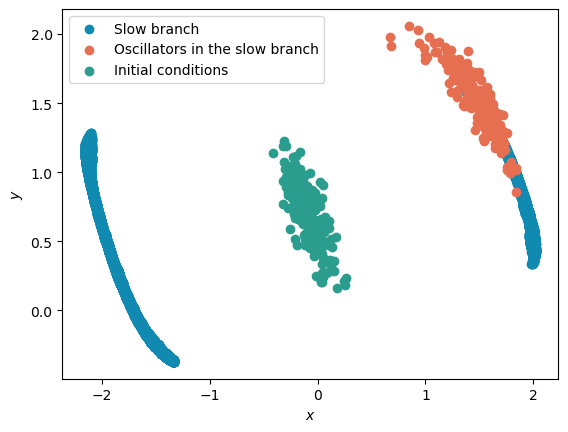

In [132]:
plt.scatter(x_BR.mean(axis = 1)[idxs_slow], y_BR.mean(axis = 1)[idxs_slow], label = 'Slow branch')
plt.scatter(x_BR[idxs_slow[-1], :], y_BR[idxs_slow[-1], :], label = 'Oscillators in the slow branch')
plt.scatter(x0_Center, y0_Center, label = "Initial conditions")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

In [133]:
xcycle, ycycle = utils.interpolate_cycle(x_BR.mean(axis = 1), y_BR.mean(axis = 1), plot_check = False)

In [22]:
Nrep = int(5e5)
t_ret_single_BR = model.find_return_times_single(Nrep, N, Nsteps, dt, cov_slow, xCenter, yCenter, epsilon,
                                                 xcycle, ycycle, tol = 1e-2, **model_kwargs)

t_return_mean_BR = model.find_return_times_mean(Nrep, N, Nsteps, dt, cov_slow, xCenter, yCenter, epsilon,
                                                xcycle, ycycle, tol = 1e-2, **model_kwargs)

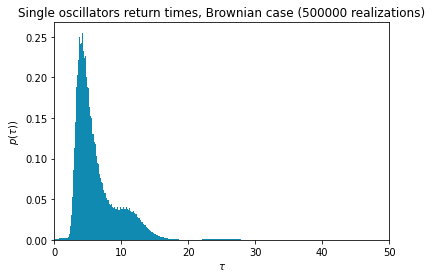

In [38]:
plt.hist(t_ret_single_BR.flatten(), bins = 500, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$)")
plt.title(f"Single oscillators return times, Brownian case ({Nrep} realizations)")
plt.xlim(0, 50)
plt.show()

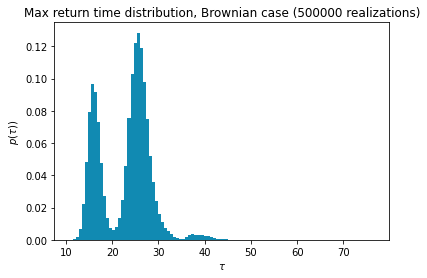

In [33]:
plt.hist(t_ret_single_BR.max(axis = 1), bins = 100, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$)")
plt.title(f"Max return time distribution, Brownian case ({Nrep} realizations)")
plt.show()

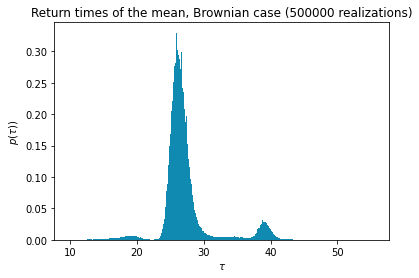

In [36]:
plt.hist(t_return_mean_BR.flatten(), bins = 500, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$)")
plt.title(f"Return times of the mean, Brownian case ({Nrep} realizations)")
plt.show()

# Quenched return times

## Quenched trajectories

In [4]:
np.random.seed(4242)
IQ = np.random.randn(N)*sigma + muI

x_QR, y_QR = model.simulate_quenched_Fitzugh_Nagumo(N, Nsteps, dt, x0rand, y0rand, epsilon = epsilon, **model_kwargs, I = IQ)

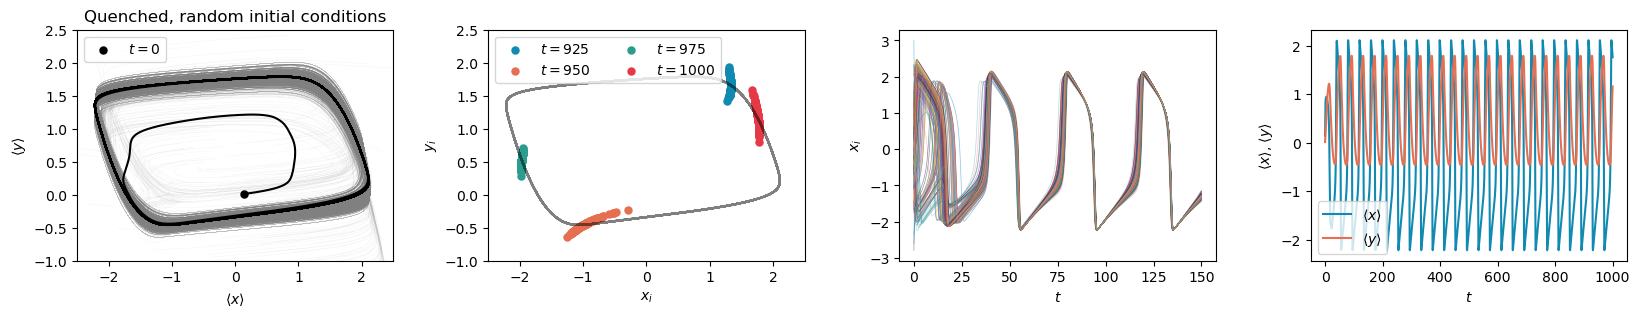

In [5]:
fig, axs = utils.plot_results(x_QR, y_QR, Time, title = 'Quenched, random initial conditions', steps_to_plot=15000, Nosc_to_plot=1000)
axs[0].set_xlim(-2.5, 2.5)
axs[0].set_ylim(-1, 2.5)

axs[1].set_xlim(-2.5, 2.5)
axs[1].set_ylim(-1, 2.5)

plt.show()

In [6]:
xy_Unst_Q = utils.find_fixed_points(IQ, epsilon = epsilon, **model_kwargs)

xCenter_Q, yCenter_Q = utils.estimate_baricenter(x_QR[-10000:], y_QR[-10000:])
xCenter_Q, yCenter_Q

(-0.08344965621913872, 0.7072156282892799)

In [11]:
argsQ = [(mu, muHat, delta, IQ[i], epsilon, alpha, beta, gamma) for i in range(N)]

xy_Unst_Q_real = []

for i in range(N):
    idx_real = np.all(np.isreal(xy_Unst_Q[i, :, :]), axis = 1)
    if np.sum(idx_real) > 1:
        print(idx_real)
    if np.any(idx_real):
        xy_Unst_Q_real.append(np.real(xy_Unst_Q[i, idx_real, :][0]))

xy_Unst_Q_real = np.array(xy_Unst_Q_real)

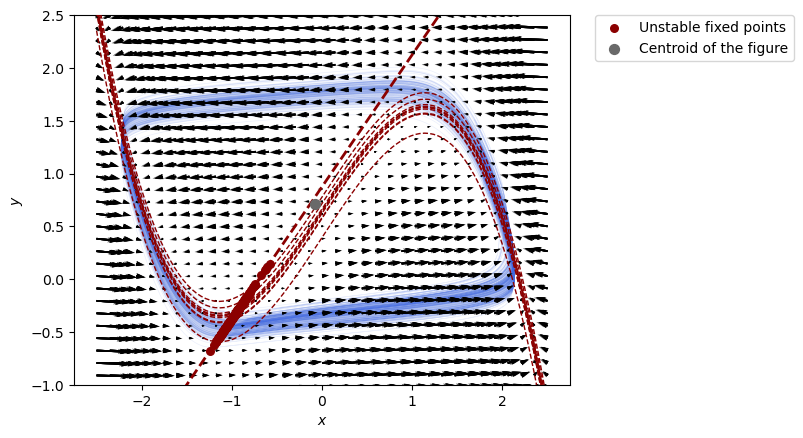

In [12]:
xspace, yspace = np.meshgrid(np.linspace(-2.5,2.5,35), np.linspace(-1.5,2.5,35))

xx = np.linspace(-2.5, 2.5, 100)
yy = np.linspace(-2.5, 2.5, 100)

for i in range(10):
    plt.quiver(xspace, yspace, *model.equations((xspace, yspace), *argsQ[i]), color='k', alpha=0.6, scale = 50, width = 0.0035)
    plt.plot(xx, ((mu + epsilon)*xx + delta*xx**3 + IQ[i])/muHat, color='darkred', alpha=1, lw = 1, zorder = 10, ls = '--')

plt.plot(xx, (xx + gamma)/beta, color='darkred', alpha=1, lw = 2, zorder = 10, ls = '--')

plt.scatter(*xy_Unst_Q_real.T, color='darkred', alpha=1, s = 30, zorder = 15, label = 'Unstable fixed points')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-1, 2.5)

plt.plot(x_QR[-5000:], y_QR[-5000:], color='royalblue', alpha=0.1, lw = 0.5, zorder = -1)

plt.scatter(xCenter_Q, yCenter_Q, color='dimgray', alpha=1, s = 50, zorder = 10, label = "Centroid of the figure")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [14]:
cov_slow_Q, idxs_slow_Q = utils.find_cov_slow(x_QR, y_QR, 0.001, return_idxs = True)
x0_Center_Q, y0_Center_Q = utils.sample_multivariate_normal(np.array([xCenter_Q, yCenter_Q]), cov_slow_Q, N)

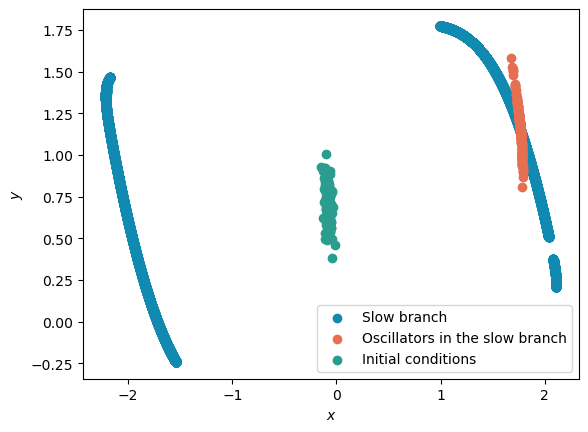

In [15]:
plt.scatter(x_QR.mean(axis = 1)[idxs_slow_Q], y_QR.mean(axis = 1)[idxs_slow_Q], label = 'Slow branch')
plt.scatter(x_QR[idxs_slow_Q[-1], :], y_QR[idxs_slow_Q[-1], :], label = 'Oscillators in the slow branch')
plt.scatter(x0_Center_Q, y0_Center_Q, label = "Initial conditions")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

In [17]:
sigma0 = 0.25

x0_Unst_Q = np.random.randn(N)*sigma0 + xy_Unst_Q_real.mean(axis = 0)[0]
y0_Unst_Q = np.random.randn(N)*sigma0 + xy_Unst_Q_real.mean(axis = 0)[1]

In [18]:
Nsteps = 10000
Time = np.arange(Nsteps)*dt

x_QR_Unst, y_QR_Unst = model.simulate_quenched_Fitzugh_Nagumo(N, Nsteps, dt, x0_Unst_Q, y0_Unst_Q, epsilon = epsilon, **model_kwargs, I = IQ)

x_QR_Center, y_QR_Center = model.simulate_quenched_Fitzugh_Nagumo(N, Nsteps, dt, x0_Center_Q, y0_Center_Q, epsilon = epsilon, **model_kwargs, I = IQ)

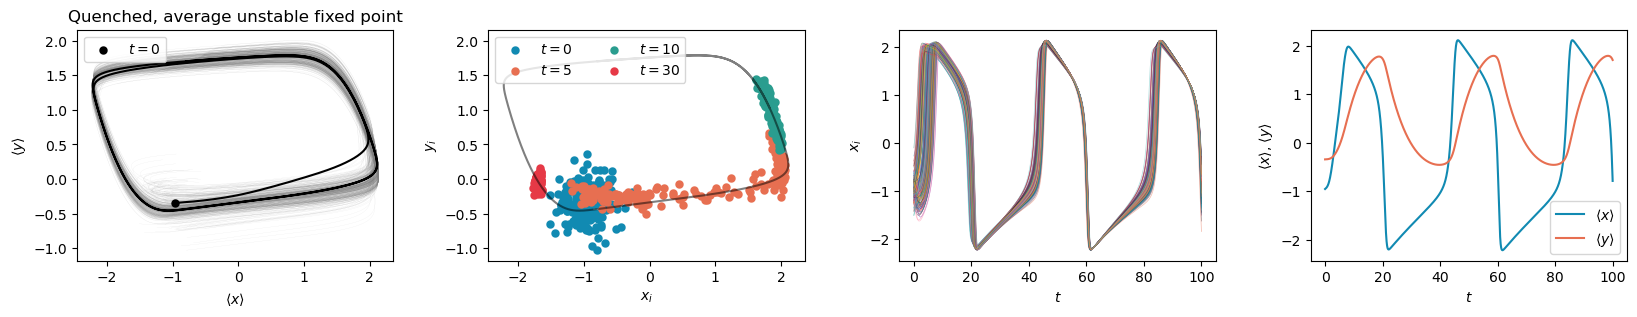

In [19]:
utils.plot_results(x_QR_Unst, y_QR_Unst, Time, title = 'Quenched, average unstable fixed point', steps_to_plot=10000, Nosc_to_plot=1000,
                   idxs_to_plot=[0, 500, 1000, 3000])
plt.show()

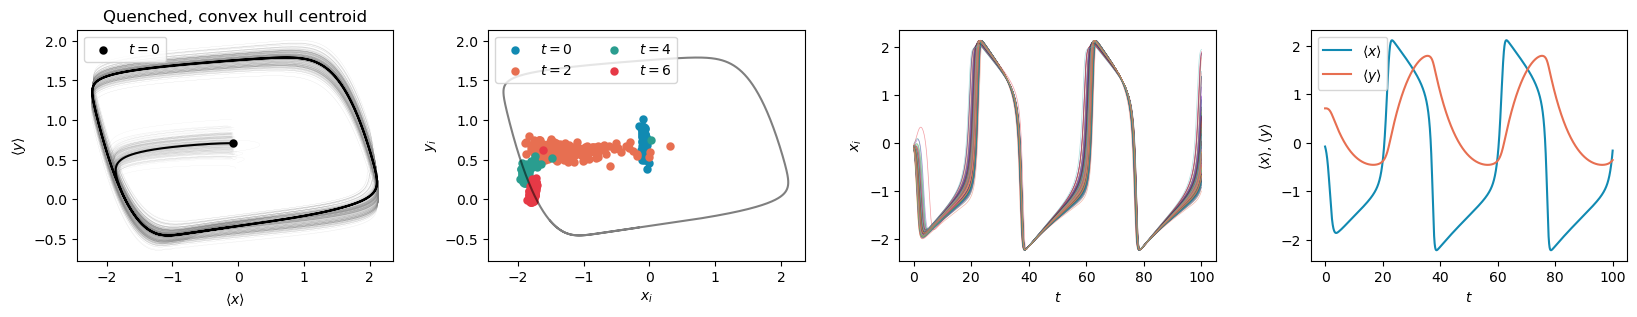

In [20]:
utils.plot_results(x_QR_Center, y_QR_Center, Time, title = 'Quenched, convex hull centroid', steps_to_plot=10000, Nosc_to_plot=1000,
                   idxs_to_plot=[0, 200, 400, 600])
plt.show()

## Return times distribution

In [21]:
IQ = np.random.randn(N)*sigma + muI

In [22]:
x_QR, y_QR = model.simulate_quenched_Fitzugh_Nagumo(N, int(2e5), dt, x0rand, y0rand, epsilon = epsilon, **model_kwargs, I = IQ)
x_QR = x_QR[-100000:]
y_QR = y_QR[-100000:]

In [23]:
xCenter_Q, yCenter_Q = utils.estimate_baricenter(x_QR, y_QR)
xCenter_Q, yCenter_Q

(-0.07679133382276092, 0.7171507793674511)

In [24]:
xcycle_Q, ycycle_Q = utils.interpolate_cycle(x_QR.mean(axis = 1), y_QR.mean(axis = 1), plot_check = False)

In [25]:
cov_slow_Q, idxs_slow_Q = utils.find_cov_slow(x_QR, y_QR, 0.002, return_idxs = True)
x0_Center_Q, y0_Center_Q = utils.sample_multivariate_normal(np.array([xCenter_Q, yCenter_Q]), cov_slow_Q, N)

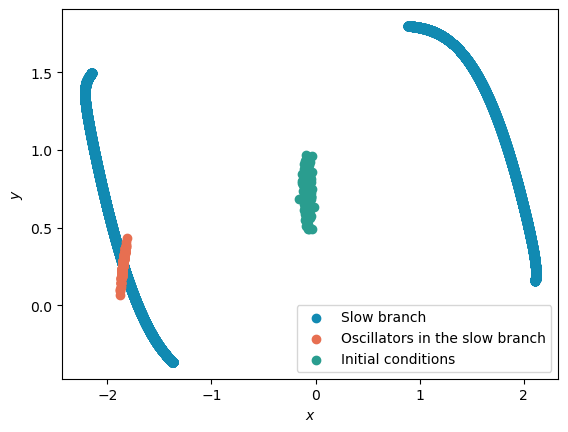

In [26]:
plt.scatter(x_QR.mean(axis = 1)[idxs_slow_Q], y_QR.mean(axis = 1)[idxs_slow_Q], label = 'Slow branch')
plt.scatter(x_QR[idxs_slow_Q[-1], :], y_QR[idxs_slow_Q[-1], :], label = 'Oscillators in the slow branch')
plt.scatter(x0_Center_Q, y0_Center_Q, label = "Initial conditions")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

In [27]:
Nrep = int(5e5)
t_ret_single_QR = model.find_return_times_single_Q(Nrep, N, Nsteps, dt, cov_slow_Q, xCenter_Q, yCenter_Q, epsilon,
                                                   xcycle_Q, ycycle_Q, tol = 1e-2, **model_kwargs)

t_return_mean_QR = model.find_return_times_mean_Q(Nrep, N, Nsteps, dt, cov_slow_Q, xCenter_Q, yCenter_Q, epsilon,
                                                  xcycle_Q, ycycle_Q, tol = 1e-2, **model_kwargs)

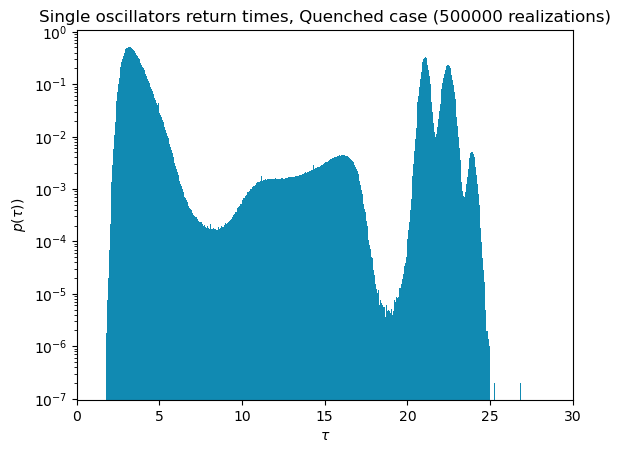

In [32]:
plt.hist(t_ret_single_QR.flatten(), bins = 500, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$)")
plt.title(f"Single oscillators return times, Quenched case ({Nrep} realizations)")
plt.xlim(0, 30)
plt.yscale('log')
plt.show()

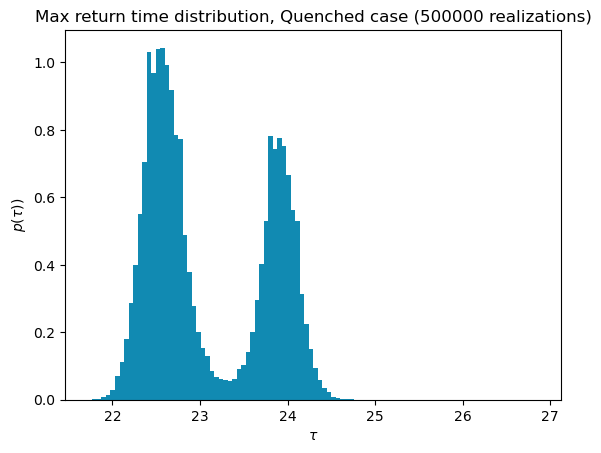

In [29]:
plt.hist(t_ret_single_QR.max(axis = 1), bins = 100, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$)")
plt.title(f"Max return time distribution, Quenched case ({Nrep} realizations)")
plt.show()

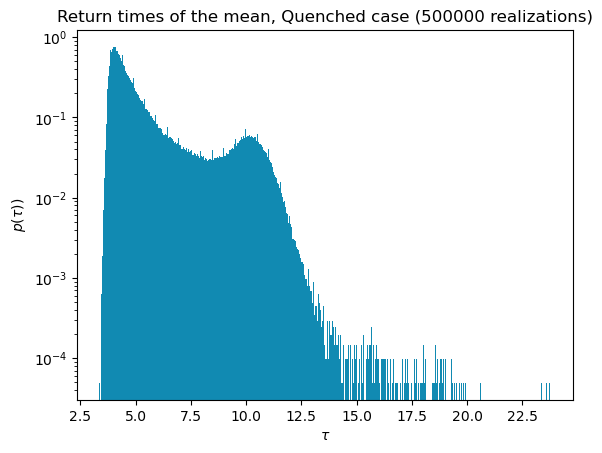

In [33]:
plt.hist(t_return_mean_QR.flatten(), bins = 500, density = True)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$p(\tau)$")
plt.title(f"Return times of the mean, Quenched case ({Nrep} realizations)")
plt.yscale('log')
plt.show()

# Plots with large-scale simulations

In [66]:
def plot_all(rs, N_list, tol_list, vmax = 50, nbins = 500):
    fig, axs = plt.subplots(2, 3, figsize = (18, 8))

    for idx, ax in np.ndenumerate(axs):
        ax.hist(rs[idx[0]][idx[1]].flatten(), bins = np.linspace(0, vmax, nbins), density = True)
        ax.set_xlabel(r"$\tau$")
        ax.set_ylabel(r"$p(\tau)$")
        ax.set_title(f"Single oscillators, Brownian (N = {N_list[idx[1]]}, tol = {tol_list[idx[0]]})")
        ax.set_xlim(0, 50)

    plt.subplots_adjust(hspace = 0.3)
    plt.show()

In [56]:
rs_BR = [[np.load("../data/return_times_single_BR_N100_tol0.01.npy"),
          np.load("../data/return_times_single_BR_N200_tol0.01.npy"),
          np.load("../data/return_times_single_BR_N400_tol0.01.npy")],
         [np.load("../data/return_times_single_BR_N100_tol0.001.npy"),
          np.load("../data/return_times_single_BR_N200_tol0.001.npy"),
          np.load("../data/return_times_single_BR_N400_tol0.001.npy")]]

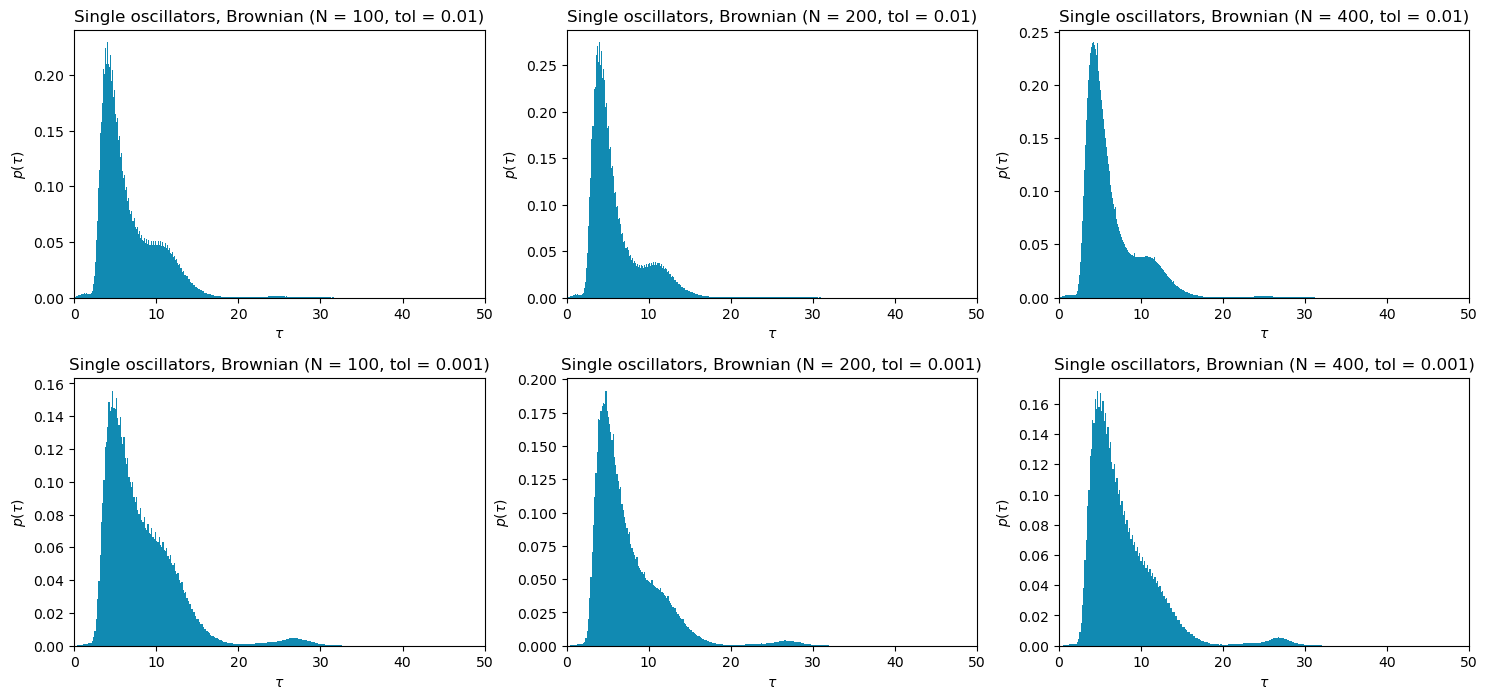

In [59]:
plot_all(rs_BR, [100,200,400], [0.01, 0.001])

In [60]:
rs_QR = [[np.load("../data/return_times_single_QR_N100_tol0.01.npy"),
          np.load("../data/return_times_single_QR_N200_tol0.01.npy"),
          np.load("../data/return_times_single_QR_N400_tol0.01.npy")],
         [np.load("../data/return_times_single_QR_N100_tol0.001.npy"),
          np.load("../data/return_times_single_QR_N200_tol0.001.npy"),
          np.load("../data/return_times_single_QR_N400_tol0.001.npy")]]   

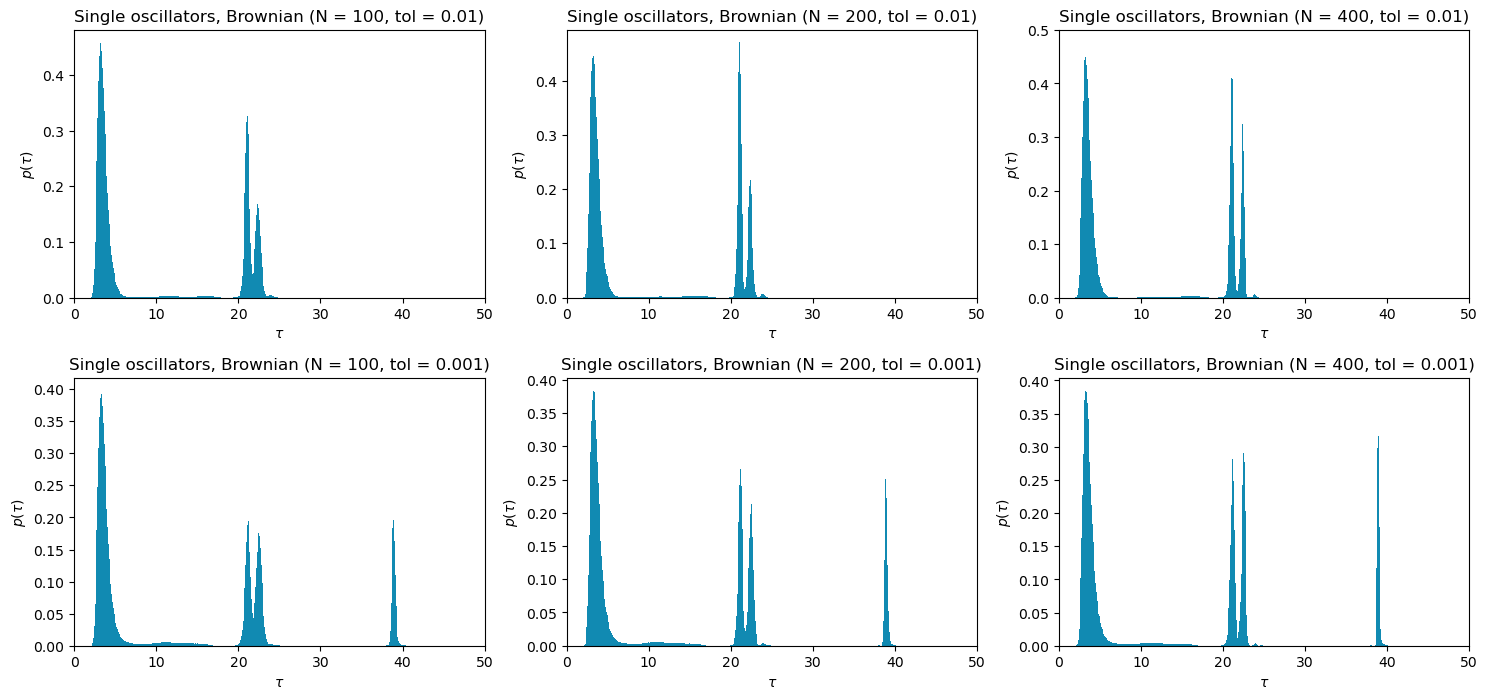

In [67]:
plot_all(rs_QR, [100,200,400], [0.01, 0.001])

In [42]:
rsBR_100_01 = np.load("../data/return_times_single_BR_N100_tol0.01.npy")
rsBR_200_01 = np.load("../data/return_times_single_BR_N200_tol0.01.npy")
rsBR_400_01 = np.load("../data/return_times_single_BR_N400_tol0.01.npy")

rsBR_100_001 = np.load("../data/return_times_single_BR_N100_tol0.001.npy")
rsBR_200_001 = np.load("../data/return_times_single_BR_N200_tol0.001.npy")
rsBR_400_001 = np.load("../data/return_times_single_BR_N400_tol0.001.npy")

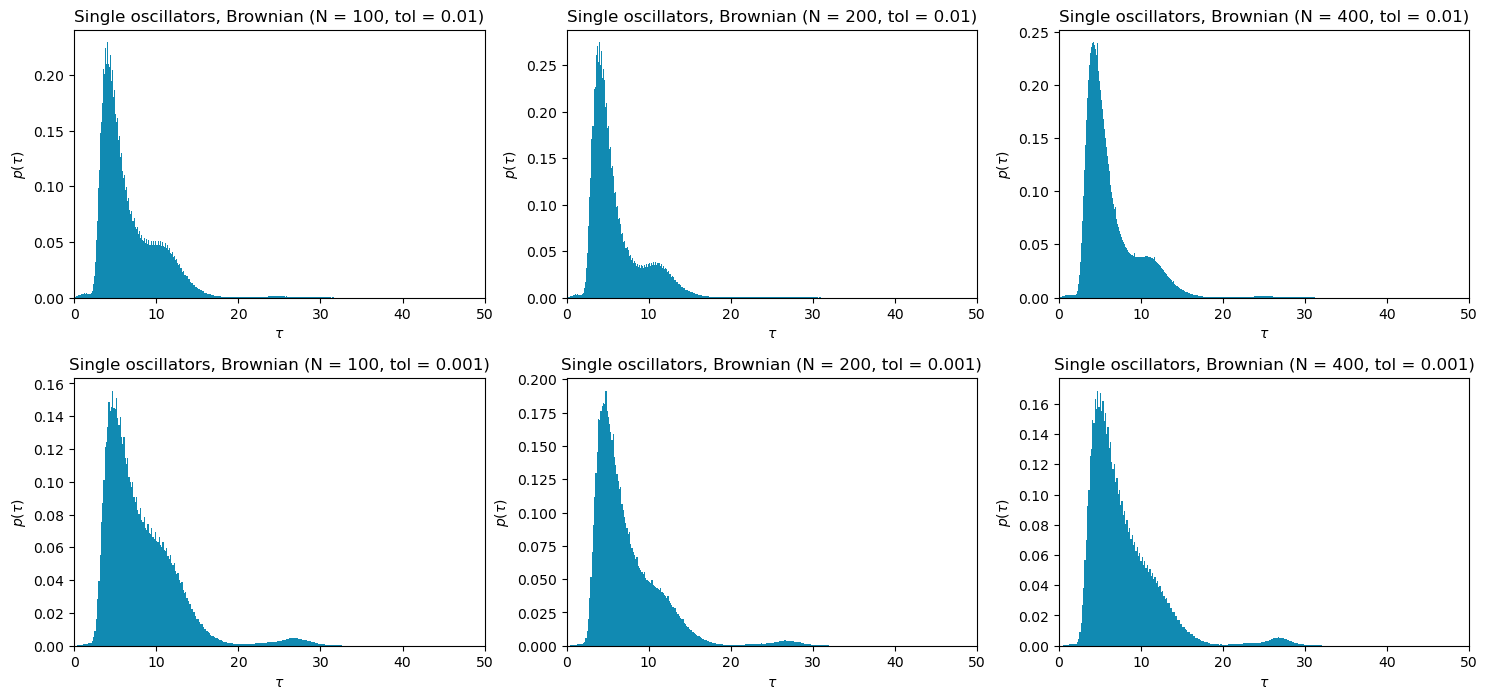

In [48]:
fig, axs = plt.subplots(2, 3, figsize = (18, 8))

axs[0, 0].hist(rsBR_100_01.flatten(), bins = 500, density = True)
axs[0, 0].set_xlabel(r"$\tau$")
axs[0, 0].set_ylabel(r"$p(\tau)$")
axs[0, 0].set_title(f"Single oscillators, Brownian (N = 100, tol = 0.01)")
axs[0, 0].set_xlim(0, 50)

axs[0, 1].hist(rsBR_200_01.flatten(), bins = 500, density = True)
axs[0, 1].set_xlabel(r"$\tau$")
axs[0, 1].set_ylabel(r"$p(\tau)$")
axs[0, 1].set_title(f"Single oscillators, Brownian (N = 200, tol = 0.01)")
axs[0, 1].set_xlim(0, 50)

axs[0, 2].hist(rsBR_400_01.flatten(), bins = 500, density = True)
axs[0, 2].set_xlabel(r"$\tau$")
axs[0, 2].set_ylabel(r"$p(\tau)$")
axs[0, 2].set_title(f"Single oscillators, Brownian (N = 400, tol = 0.01)")
axs[0, 2].set_xlim(0, 50)

axs[1, 0].hist(rsBR_100_001.flatten(), bins = 500, density = True)
axs[1, 0].set_xlabel(r"$\tau$")
axs[1, 0].set_ylabel(r"$p(\tau)$")
axs[1, 0].set_title(f"Single oscillators, Brownian (N = 100, tol = 0.001)")
axs[1, 0].set_xlim(0, 50)

axs[1, 1].hist(rsBR_200_001.flatten(), bins = 500, density = True)
axs[1, 1].set_xlabel(r"$\tau$")
axs[1, 1].set_ylabel(r"$p(\tau)$")
axs[1, 1].set_title(f"Single oscillators, Brownian (N = 200, tol = 0.001)")
axs[1, 1].set_xlim(0, 50)

axs[1, 2].hist(rsBR_400_001.flatten(), bins = 500, density = True)
axs[1, 2].set_xlabel(r"$\tau$")
axs[1, 2].set_ylabel(r"$p(\tau)$")
axs[1, 2].set_title(f"Single oscillators, Brownian (N = 400, tol = 0.001)")
axs[1, 2].set_xlim(0, 50)

plt.subplots_adjust(hspace = 0.3)
plt.show()